In [1]:
import cv2
import numpy as np
import pandas as pd
import re
import math
from skimage import feature
from skimage.feature import hog
from imutils import paths
from google.colab.patches import cv2_imshow
import os
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Input
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as pl
from matplotlib.ticker import FuncFormatter
from matplotlib.cm import get_cmap
import urllib
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network  import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import manifold, datasets
from sklearn.manifold.t_sne import TSNE
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

rng = np.random.RandomState(123)

# Load Inception_v3 pretrained on ImageNet dataset
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', input_tensor=Input(shape=(299,299,3)))

# List of paths 
file_list=[]
file_list.append(os.listdir(r"/content/drive/My Drive/Base/humanos"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/praia"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/obras"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/onibus"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/dino"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/elefante"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/flores"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/cavalos"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/montanhas"))
file_list.append(os.listdir(r"/content/drive/My Drive/Base/comida"))

# general path
path='/content/drive/My Drive/Base/'

# list of classes
class_names=['humanos', 'praia', 'obras', 'onibus', 'dino', 'elefante', 'flores', 'cavalos', 'montanhas', 'comida'] 



X = []
X_deep = []
y = []

# Feature extraction
for classes_files, classe in zip (file_list, range(10)):
    for i in range(100):
      name= str(path) + str(class_names[classe]) + str('/') + str(classes_files[i]) 
      imagem = cv2.imread(name)
      print(imagem.shape)
      altura, largura, _ = imagem.shape
    
# Convert the image to RGB and Gray    
      cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
      rgb   = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Color Histograms
      r_histograma = cv2.calcHist([rgb], [0], None, [256], [0, 256])/(altura*largura)
      g_histograma = cv2.calcHist([rgb], [1], None, [256], [0, 256])/(altura*largura)
      b_histograma = cv2.calcHist([rgb], [2], None, [256], [0, 256])/(altura*largura)

# Local Binary Pattern (LBP)
      lbp = feature.local_binary_pattern(cinza, 59, 1, method="uniform")
      (lbp_histograma, _) = np.histogram(lbp.ravel(), bins=59, range=(0, 59))
      lbp_histograma = lbp_histograma.astype("float")
      lbp_histograma /= (lbp_histograma.sum())
    
# Hog (Hostogram of Gradient - Direction)
      hg = hog(cinza, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(8, 8), block_norm='L2-Hys')
    
# Concatenate the handcrafted feature sets
      X_image = [lbp_histograma, hg, r_histograma, g_histograma, b_histograma]    
      X_image_aux = []
      for aux in X_image:
          X_image_aux = np.append(X_image_aux, np.ravel(aux))
    
      X_image = [i for i in X_image_aux]
      y.append(classe)
      X.append(X_image)
      
# Extract deep features using InceptionV3 pretrained model 
      img = cv2.resize(imagem,(299,299))
      xd = image.img_to_array(img)
      xd = np.expand_dims(xd, axis=0)
      xd = preprocess_input(xd)
      deep_features = model.predict(xd)
      print(deep_features.shape)
      
      X_image_aux = []
      for aux in deep_features:
          X_image_aux = np.append(X_image_aux, np.ravel(aux))
    
      deep_features = [i for i in X_image_aux]
      
      X_deep.append(deep_features)

            
# Saving the extracted features (handcrafted) in a csv file
df = pd.DataFrame(X)
df.to_csv('X.csv', header=False, index=False)

# Saving the extracted features (deep) in a csv file
df = pd.DataFrame(X_deep)
df.to_csv('X_deep.csv', header=False, index=False)

# Saving the classes in a csv file
df_class = pd.DataFrame(y)
df_class.to_csv('y.csv', header=False, index=False)


# Loading the csv files (features and labels)
# Labels
y = pd.read_csv('y.csv', header=None)
y=y.to_numpy()
y=np.ravel(y)
print(y.shape)

# handcrafted features
X = pd.read_csv('X.csv', header=None)
X=X.to_numpy()
print(X.shape)

# deep features
X_deep = pd.read_csv('X_deep.csv', header=None)
X_deep = X_deep.to_numpy()
#pca = PCA(n_components=100)
#X=pca.fit_transform(X)
print(X_deep.shape)






Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive








87916544/87910968 [==============================] - 1s 0us/step
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(384, 256, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 384, 3)
(1, 2048)
(256, 3

In [0]:
def plot_dataset(X, y, ax=None, title=None, **params):

    X_t=pd.DataFrame(X)
    y=pd.DataFrame(y)
    XY=pd.concat([X_t,y], axis=1)
    XY.columns = ['x', 'y', 'digit']

    customPalette=sns.hls_palette(10, l=.7, s=1)

    ax.set_xlim(XY['x'].min()*0.98,XY['x'].max()*1.02)
    ax.set_ylim(XY['y'].min()*0.98,XY['y'].max()*1.02)

    for i in range(0,10):
        k=0
        for l, row in XY.loc[XY['digit']==i,:].iterrows():
            if k==0: 
                ax.plot(row['x'], row['y'], '.', color=customPalette[i], label=class_names[i])
                ax.legend(numpoints=1, markerscale=3, loc='upper right', bbox_to_anchor=(1.3, 1.0))
                k += 1    
            ax.annotate(int(row['digit']), (row['x'], row['y']), horizontalalignment='center', verticalalignment='center', size=10, color=customPalette[i])
            ax.set_title(title, fontsize=15)
            
    return ax

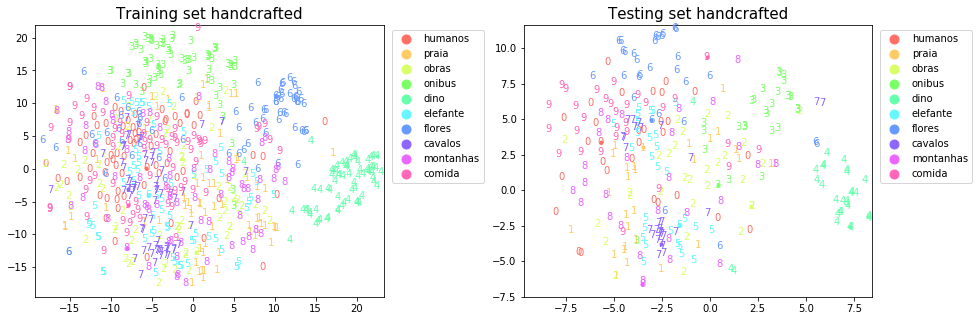

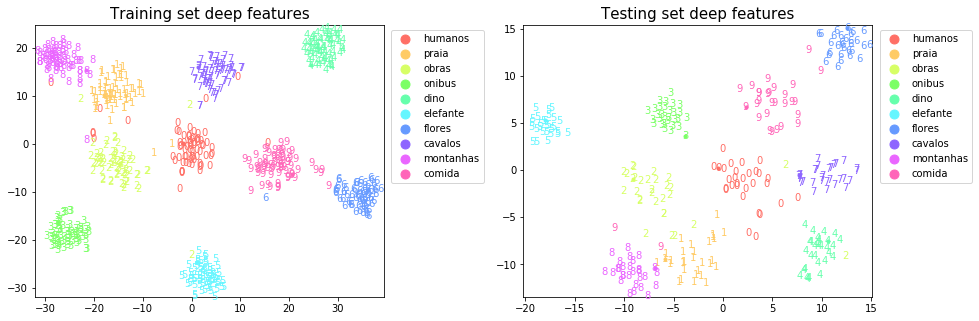

In [3]:
# EXEMPLO USANDO HOLDOUT - handcrafted features
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

X_handcrafted_Embedded_train = TSNE(n_components=2).fit_transform(X_train)
X_handcrafted_Embedded = TSNE(n_components=2).fit_transform(X_test)

#Ploting the result
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plot_dataset(X_handcrafted_Embedded_train, y_train, ax=axs[0], title='Training set handcrafted')
plot_dataset(X_handcrafted_Embedded, y_test, ax=axs[1], title='Testing set handcrafted')

# EXEMPLO USANDO HOLDOUT - deep features
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_deep_train, X_deep_test, y_deep_train, y_deep_test = train_test_split(X_deep,y,test_size=.3, random_state=42, stratify=y)

X_deep_Embedded_train = TSNE(n_components=2).fit_transform(X_deep_train)
X_deep_Embedded = TSNE(n_components=2).fit_transform(X_deep_test)

#Ploting the result
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plot_dataset(X_deep_Embedded_train, y_deep_train, ax=axs[0], title='Training set deep features')
plot_dataset(X_deep_Embedded, y_deep_test, ax=axs[1], title='Testing set deep features')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define single classifiers
lr = LogisticRegression()
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=3)
mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(100), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
rf = RandomForestClassifier(n_estimators=100, random_state=0)
cb = VotingClassifier(estimators=[('DecisionTree', dt), ('NaiveBayes', nb)], voting='soft')

# parameters for SVM
parameters = [
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['poly']},
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
]
svm = SVC(gamma='scale', probability=True)
svm = GridSearchCV(svm, parameters, scoring = 'accuracy', cv=10, iid=False)

#bagging
bbg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5)

#Boosting
ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=0)

titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'SVM', 'RF']
methods = [lr, dt, knn, nb, mlp, svm, rf]

# Treina os classificadores e apresenta os resultados - handcrafted
scores = []
predictedDf = []
predp = []
matrixes = []


for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    predicted = method.predict(X_test)
    scores.append(method.score(X_test, y_test))
    predp.append(method.predict_proba(X_test))
    matrixes.append(confusion_matrix(y_test, predicted))
    predictedDf.append(predicted)
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification accuracy LogisticRegresson = 0.6633333333333333
Classification accuracy DecisionTree = 0.67
Classification accuracy KNN = 0.39666666666666667
Classification accuracy NaiveBayes = 0.8433333333333334
Classification accuracy MLP = 0.2
Classification accuracy SVM = 0.71
Classification accuracy RF = 0.8566666666666667
Classification accuracy DT+NB = 0.7266666666666667
Classification accuracy BBG = 0.38333333333333336
Classification accuracy ADA = 0.6266666666666667


In [9]:
for i in range(7):
  print("Confusion Matrix " + titles[i] + ":")
  print(matrixes[i])
  print("\n\n")


Confusion Matrix LogisticRegresson:
[[14  1  1  0  0  4  2  6  1  1]
 [ 1 12  1  1  0  3  1  3  5  3]
 [ 2  4 16  2  0  6  0  0  0  0]
 [ 0  2  1 27  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 3  1  0  0  0 21  0  2  2  1]
 [ 2  0  0  0  0  0 23  0  3  2]
 [ 2  0  0  1  0  2  0 25  0  0]
 [ 3  9  1  0  0  4  0  2 10  1]
 [ 3  2  1  0  0  0  2  0  1 21]]



Confusion Matrix DecisionTree:
[[17  0  3  1  1  3  0  0  3  2]
 [ 0 13  8  2  0  2  0  0  2  3]
 [ 4  6 11  3  1  1  1  0  2  1]
 [ 0  1  2 27  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  1  1]
 [ 1  1  2  0  0 20  0  2  2  2]
 [ 3  1  0  0  0  0 24  0  0  2]
 [ 2  0  0  0  0  4  0 23  1  0]
 [ 2  2  3  1  2  1  0  2 17  0]
 [ 1  0  3  0  0  3  0  1  1 21]]



Confusion Matrix KNN:
[[ 1  1  0  0  0  1  0 27  0  0]
 [ 6  7  2  0  0  1  0 12  2  0]
 [ 4  4  6  1  0  0  0 15  0  0]
 [ 0  5  2 21  0  1  0  1  0  0]
 [ 0  1  0  0 29  0  0  0  0  0]
 [ 2  0  2  0  0  9  0 17  0  0]
 [ 2  1  2  0  0  2 15  8  0  0]
 [ 0  0  3  

In [17]:
# Plot mistakes (images)
for k in range(7):
  print(titles[k])
  print(predictedDf[k].shape)
  for i in range(len(predictedDf[k])):
      if (predictedDf[k][i] != y_test[i]):
          dist=1
          j=0
          while (j<len(X) and dist !=0): 
              dist = np.linalg.norm(X[j]-X_test[i])
              j+=1
          print("Label:", y[j-1], class_names[y[j-1]], "  /  Prediction: ", predictedDf[k][i], class_names[predictedDf[k][i]] , "proba", predp[k][i][predictedDf[k][i]])
          name= "/content/drive/My Drive/Base/" + str(class_names[y[j-1]]) + "/" + str(j)+ ".jpg" 
          print(name)
          #im=cv2.imread(name)
          #cv2_imshow(im)
          print("=============================================================================")
  


LogisticRegresson
(300,)
Label: 8 montanhas   /  Prediction:  5 elefante proba 0.32950861507724466
/content/drive/My Drive/Base/montanhas/878.jpg
Label: 8 montanhas   /  Prediction:  1 praia proba 0.5497637427116057
/content/drive/My Drive/Base/montanhas/875.jpg
Label: 1 praia   /  Prediction:  7 cavalos proba 0.25361589681807334
/content/drive/My Drive/Base/praia/107.jpg
Label: 6 flores   /  Prediction:  0 humanos proba 0.24985304514355486
/content/drive/My Drive/Base/flores/674.jpg
Label: 0 humanos   /  Prediction:  9 comida proba 0.2905583628730076
/content/drive/My Drive/Base/humanos/24.jpg
Label: 2 obras   /  Prediction:  3 onibus proba 0.4754653511683261
/content/drive/My Drive/Base/obras/277.jpg
Label: 1 praia   /  Prediction:  6 flores proba 0.296589097602919
/content/drive/My Drive/Base/praia/134.jpg
Label: 9 comida   /  Prediction:  0 humanos proba 0.3195569738973378
/content/drive/My Drive/Base/comida/964.jpg
Label: 8 montanhas   /  Prediction:  1 praia proba 0.3057935046344

In [12]:
scores2 = []
predictedDf2 = []
predp2 = []
matrixes2 = []

for method, name in zip(methods, titles):
    method.fit(X_deep_train, y_deep_train)
    predicted = method.predict(X_deep_test)
    scores2.append(method.score(X_deep_test, y_deep_test))
    predp2.append(method.predict_proba(X_deep_test))
    matrixes2.append(confusion_matrix(y_deep_test, predicted))
    predictedDf2.append(predicted)
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_deep_test, y_deep_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Classification accuracy LogisticRegresson = 0.9866666666666667
Classification accuracy DecisionTree = 0.7733333333333333
Classification accuracy KNN = 0.97
Classification accuracy NaiveBayes = 0.9433333333333334
Classification accuracy MLP = 0.97
Classification accuracy SVM = 0.9833333333333333
Classification accuracy RF = 0.9733333333333334
Classification accuracy DT+NB = 0.85
Classification accuracy BBG = 0.9633333333333334
Classification accuracy ADA = 0.7766666666666666


In [20]:
for i in range(7):
  print("Confusion Matrix " + titles[i] + ":")
  print(matrixes2[i])
  print("\n\n")

Confusion Matrix LogisticRegresson:
[[28  1  0  0  0  0  0  0  0  1]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  1 28  0  1  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0 30]]



Confusion Matrix DecisionTree:
[[12  4  2  1  2  2  1  3  0  3]
 [ 4 22  1  0  0  0  0  0  1  2]
 [ 6  3 18  0  0  0  0  0  2  1]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 1  3  2  0 21  0  2  1  0  0]
 [ 0  1  0  0  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  1  2]
 [ 0  0  0  0  0  0  0 29  0  1]
 [ 0  0  0  0  0  0  0  1 26  3]
 [ 3  3  1  0  1  0  2  1  1 18]]



Confusion Matrix KNN:
[[26  2  0  0  1  0  0  0  0  1]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  1 28  0  1  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  

In [19]:
# Plot mistakes (images)
for k in range(7):
  print(titles[k])
  print(predictedDf2[k].shape)
  for i in range(len(predictedDf2[k])):
      if (predictedDf2[k][i] != y_deep_test[i]):
          dist=1
          j=0
          while (j<len(X_deep) and dist !=0): 
              dist = np.linalg.norm(X_deep[j]-X_deep_test[i])
              j+=1
          print("Label:", y[j-1], class_names[y[j-1]], "  /  Prediction: ", predictedDf2[k][i], class_names[predictedDf2[k][i]] , "proba", predp2[k][i][predictedDf2[k][i]])
          name= "/content/drive/My Drive/Base/" + str(class_names[y[j-1]]) + "/" + str(j)+ ".jpg" 
          print(name)
          #im=cv2.imread(name)
          #cv2_imshow(im)
          print("=============================================================================")

LogisticRegresson
(300,)
Label: 2 obras   /  Prediction:  1 praia proba 0.3929105845786363
/content/drive/My Drive/Base/obras/297.jpg
Label: 0 humanos   /  Prediction:  9 comida proba 0.9296879822790137
/content/drive/My Drive/Base/humanos/75.jpg
Label: 2 obras   /  Prediction:  4 dino proba 0.575441287886532
/content/drive/My Drive/Base/obras/299.jpg
Label: 0 humanos   /  Prediction:  1 praia proba 0.7160476443821734
/content/drive/My Drive/Base/humanos/72.jpg
DecisionTree
(300,)
Label: 8 montanhas   /  Prediction:  9 comida proba 1.0
/content/drive/My Drive/Base/montanhas/878.jpg
Label: 1 praia   /  Prediction:  0 humanos proba 1.0
/content/drive/My Drive/Base/praia/107.jpg
Label: 2 obras   /  Prediction:  0 humanos proba 1.0
/content/drive/My Drive/Base/obras/270.jpg
Label: 4 dino   /  Prediction:  6 flores proba 1.0
/content/drive/My Drive/Base/dino/406.jpg
Label: 0 humanos   /  Prediction:  9 comida proba 1.0
/content/drive/My Drive/Base/humanos/24.jpg
Label: 2 obras   /  Predicti